**DNN: analysis with Keras of sequences**

Now we will see how to implement a NN usign Keras

In [1]:
import math
import csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# reproducibility
np.random.seed(12345)

# digits 1..9
D = 9
# fraction of training data
perc_train = 0.8

Using TensorFlow backend.


In [2]:
fname = 'secretkeys.csv'
dataset = np.loadtxt(fname, delimiter=',', dtype=int)
N = len(dataset)
print(f'data: {N}')
# extract data and labels (rememeber to "decompress" data)
s = dataset[:,0]
y = dataset[:,-1]

# length of a given string
L = len(str(s[0]))
print(L)
LD = L*D

for i in range(10):
    print(s[i],y[i])
    
N_train = int(perc_train*N)
print(f'\ndata: {N}\ntrain: {N_train}')

data: 1000
6
457362 0
593936 0
993382 1
661861 0
113352 0
237496 0
284935 1
931351 0
469637 0
111827 0

data: 1000
train: 800


In [3]:
def expand(S):
    if (len(str(S))!=L):
        print('mismatch!')
        return []
    x = [0] * LD
    p = 10**(L-1)
    j = 0
    while j<L:
        q = int(S/p)
        # notice that 1...9 --> 0...8 because we are dealing with python indices 
        x[j*D+(q-1)] = 1
        j += 1
        S = S-q*p
        p = int(p/10)
    return x

print(s[0], '-->', expand(s[0]))
print(111111, '-->', expand(111111))
print(999999, '-->', expand(999999))

457362 --> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
111111 --> [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
999999 --> [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]


Split training and test data

In [4]:
x_all = [None]*N
for i in range(N):
    x_all[i] = expand(s[i])
    
print(x_all[0])

(x_train, y_train) = (x_all[0:N_train],y[0:N_train])
(x_test, y_test) = (x_all[N_train:],y[N_train:])
print(len(x_train),'\t',len(x_test))

# Care that Keras want np arrays (in this case no needed)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
800 	 200


Define the model with Keras

In [5]:
model = Sequential()
model.add(Dense(LD,input_shape=(LD,),activation='relu'))          # Choosing the architecture of the network
model.add(Dense(max(10,int(LD/2)),activation='relu'))             # arbitrary
model.add(Dense(max(6,int(LD/4)),activation='relu')) 
model.add(Dropout(0.2))                      
model.add(Dense(1,activation='sigmoid'))  

print(model.summary())

# Dropout want to remove a node with a certain probability, 
# introducing some stocasticity and preventing overfitting and determinism in the results

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 54)                2970      
_________________________________________________________________
dense_2 (Dense)              (None, 27)                1485      
_________________________________________________________________
dense_3 (Dense)              (None, 13)                364       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 14        
Total params: 4,833
Trainable params: 4,833
Non-trainable params: 0
_________________________________________________________________
None


Optimization method and cost function

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Training

In [7]:
fit = model.fit(x_train, y_train, 
                epochs=80, 
                batch_size=20, 
                validation_data=(x_test,y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/80
800/800 [==============================] - 1s 997us/step - loss: 0.6380 - accuracy: 0.6888 - val_loss: 0.5672 - val_accuracy: 0.7450
Epoch 2/80
800/800 [==============================] - 0s 147us/step - loss: 0.5400 - accuracy: 0.7450 - val_loss: 0.4983 - val_accuracy: 0.7450
Epoch 3/80
800/800 [==============================] - 0s 162us/step - loss: 0.4781 - accuracy: 0.7487 - val_loss: 0.4387 - val_accuracy: 0.7700
Epoch 4/80
800/800 [==============================] - 0s 139us/step - loss: 0.4092 - accuracy: 0.8012 - val_loss: 0.3736 - val_accuracy: 0.8300
Epoch 5/80
800/800 [==============================] - 0s 153us/step - loss: 0.3480 - accuracy: 0.8413 - val_loss: 0.3261 - val_accuracy: 0.8450
Epoch 6/80
800/800 [==============================] - 0s 130us/step - loss: 0.2998 - accuracy: 0.8637 - val_loss: 0.3048 - val_accuracy: 0.8650
Epoch 7/80
800/800 [==============================] - 0s 129us/step - loss: 0.2462 - accur

800/800 [==============================] - 0s 157us/step - loss: 9.3991e-04 - accuracy: 1.0000 - val_loss: 0.2283 - val_accuracy: 0.9400
Epoch 58/80
800/800 [==============================] - 0s 146us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2347 - val_accuracy: 0.9400
Epoch 59/80
800/800 [==============================] - 0s 184us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2122 - val_accuracy: 0.9450
Epoch 60/80
800/800 [==============================] - 0s 347us/step - loss: 6.8202e-04 - accuracy: 1.0000 - val_loss: 0.2084 - val_accuracy: 0.9450
Epoch 61/80
800/800 [==============================] - 0s 374us/step - loss: 9.3886e-04 - accuracy: 1.0000 - val_loss: 0.2175 - val_accuracy: 0.9450
Epoch 62/80
800/800 [==============================] - 0s 359us/step - loss: 7.3333e-04 - accuracy: 1.0000 - val_loss: 0.2100 - val_accuracy: 0.9500
Epoch 63/80
800/800 [==============================] - 0s 475us/step - loss: 7.4124e-04 - accuracy: 1.0000 - val_loss: 0.1942 

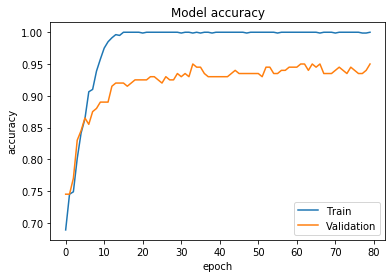

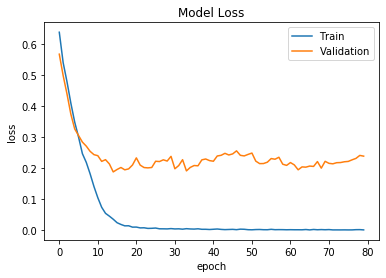

In [8]:
import matplotlib.pyplot as plt

# Plot the accuracy of the model
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'])
plt.show()

# Plot the loss of the model
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'])
plt.show()